In [45]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

%matplotlib inline
plt.rcParams['figure.figsize']= (8,8)

dengue_train = pd.read_csv('./data/dengue_features_train.csv')
dengue_test = pd.read_csv('./data/dengue_features_test.csv')
dengue_labels_train = pd.read_csv('./data/dengue_labels_train.csv')

print("Dengue Features Train shape:", dengue_train.shape)
print("Dengue Features Test shape:", dengue_test.shape)
print("Dengue Labels Train shape:", dengue_labels_train.shape)

Dengue Features Train shape: (1456, 24)
Dengue Features Test shape: (416, 24)
Dengue Labels Train shape: (1456, 4)


## Dengue Features Dataset
This describes the factors of climate and vegetation during the training period.
- city: City abbreviations: sj for San Juan and iq for Iquitos (string)
- week_start_date: Date given in yyyy-mm-dd format (string)
- weekofyear: The number of week of the year (integer)
- year: The year in yyyy format (integer)

- station_max_temp_c: Maximum temperature (float)
- station_min_temp_c: Minimum temperature (float)
- station_avg_temp_c: Average temperature (float)
- station_precip_mm: Total precipitation (float)
- station_diur_temp_rng_c: Diurnal temperature range (float)

- precipitation_amt_mm: Total precipitation (float)

- reanalysis_sat_precip_amt_mm: Total precipitation (float)
- reanalysis_dew_point_temp_k: Mean dew point temperature (float)
- reanalysis_air_temp_k: Mean air temperature (float)
- reanalysis_relative_humidity_percent: Mean relative humidity (float)
- reanalysis_specific_humidity_g_per_kg: Mean specific humidity (float)
- reanalysis_precip_amt_kg_per_m2: Total precipitation (float)
- reanalysis_max_air_temp_k: Maximum air temperature (float)
- reanalysis_min_air_temp_k: Minimum air temperature (float)
- reanalysis_avg_temp_k: Average air temperature (float)
- reanalysis_tdtr_k: Diurnal temperature range (float)

- ndvi_se: Pixel southeast of city centroid (float)
- ndvi_sw: Pixel southwest of city centroid (float)
- ndvi_ne: Pixel northeast of city centroid (float)
- ndvi_nw: Pixel northwest of city centroid (float)

## Dengue Labels Dataset
This describes the factors of climate and vegetation during the training period.
- city: City abbreviations: sj for San Juan and iq for Iquitos
- year: The year in yyyy format
- weekofyear: The number of week of the year
- total_cases: The total number of cases active in that city for the week and year.

In [46]:
# Merge labels and features
train_set = pd.merge(dengue_train.copy(), dengue_labels_train.copy(), how='right', on=['city', 'year', 'weekofyear'])

# Change or drop non-number columns
train_set['city'] = np.where(train_set.city == 'sj', 1, 0)
train_set = train_set.drop(columns=['week_start_date'])

# Drop null valued columns
print(train_set.shape)
train_set = train_set.dropna()
print(train_set.shape)

#change temp from c to k
celsius_list = ['station_max_temp_c', 'station_min_temp_c', 'station_avg_temp_c' ]
for col in celsius_list:
    train_set[col] = train_set[col] + 273.15
#renaming the columns to end with _k 
train_set = train_set.rename(columns = { name : name[:-2] + '_k' for name in celsius_list })

# Inspect dataset
train_set.head()

(1456, 24)
(1199, 24)


,city,year,weekofyear,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,...,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_k,station_diur_temp_rng_c,station_max_temp_k,station_min_temp_k,station_precip_mm,total_cases
0,1,1990,18,0.122600,0.103725,0.198483,0.177617,12.42,297.572857,297.742857,...,73.365714,12.42,14.012857,2.628571,298.592857,6.900000,302.55,293.15,16.0,4
1,1,1990,19,0.169900,0.142175,0.162357,0.155486,22.82,298.211429,298.442857,...,77.368571,22.82,15.372857,2.371429,299.864286,6.371429,304.85,295.35,8.6,5
2,1,1990,20,0.032250,0.172967,0.157200,0.170843,34.54,298.781429,298.878571,...,82.052857,34.54,16.848571,2.300000,299.864286,6.485714,305.35,295.95,41.4,4
3,1,1990,21,0.128633,0.245067,0.227557,0.235886,15.36,298.987143,299.228571,...,80.337143,15.36,16.672857,2.428571,300.621429,6.771429,306.45,296.45,4.0,3
4,1,1990,22,0.196200,0.262200,0.251200,0.247340,7.52,299.518571,299.664286,...,80.460000,7.52,17.210000,3.014286,302.092857,9.371429,308.15,297.05,5.8,6


In [47]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(train_set.drop(columns=['total_cases']), train_set.total_cases, test_size=0.2)

## Explorartory Analysis
Exploring the coefficients

In [48]:
train_set.columns

Index(['city', 'year', 'weekofyear', 'ndvi_ne', 'ndvi_nw', 'ndvi_se',
       'ndvi_sw', 'precipitation_amt_mm', 'reanalysis_air_temp_k',
       'reanalysis_avg_temp_k', 'reanalysis_dew_point_temp_k',
       'reanalysis_max_air_temp_k', 'reanalysis_min_air_temp_k',
       'reanalysis_precip_amt_kg_per_m2',
       'reanalysis_relative_humidity_percent', 'reanalysis_sat_precip_amt_mm',
       'reanalysis_specific_humidity_g_per_kg', 'reanalysis_tdtr_k',
       'station_avg_temp_k', 'station_diur_temp_rng_c', 'station_max_temp_k',
       'station_min_temp_k', 'station_precip_mm', 'total_cases'],
      dtype='object')

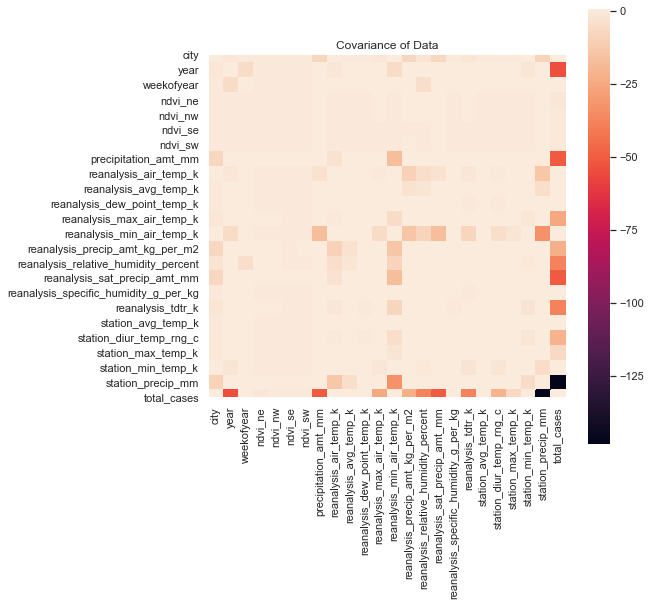

In [49]:
data_covariance = train_set.cov()
sns.heatmap(data_covariance, vmax=.8, square=True)
plt.title("Covariance of Data")
plt.show()

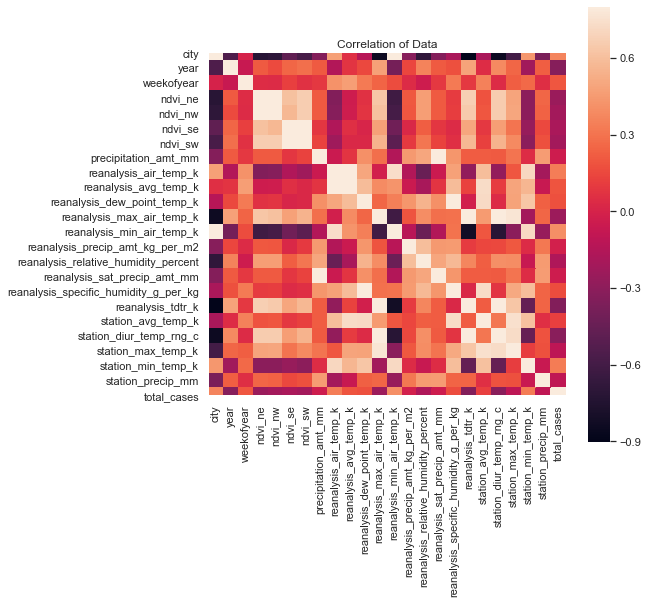

In [50]:
data_corr = train_set.corr()
sns.heatmap(data_corr , vmax=.8, square=True)
plt.title("Correlation of Data")
plt.show()

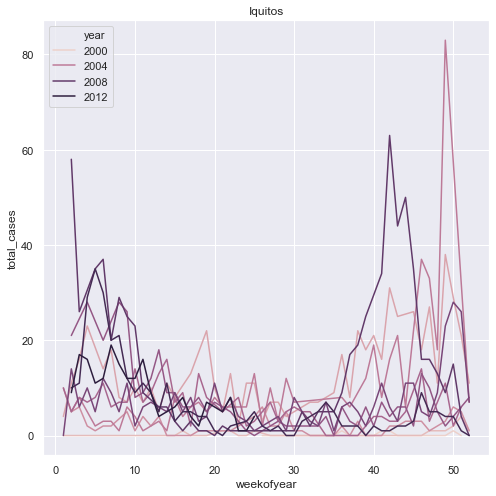

In [51]:
ax = sns.lineplot(x="weekofyear", y="total_cases", hue="year",data = train_set[train_set.city == 0]);
ax.set_title('Iquitos');

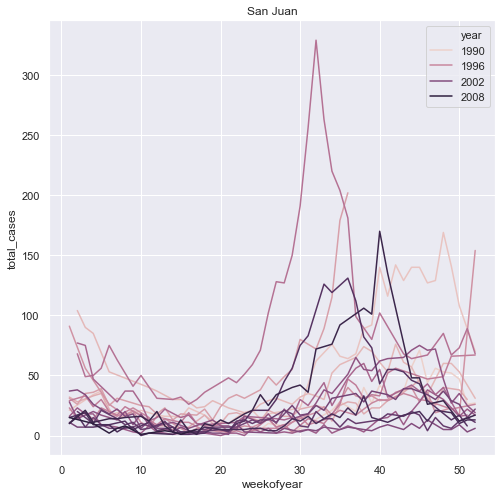

In [52]:
ax = sns.lineplot(x="weekofyear", y="total_cases", hue="year",data = train_set[train_set.city == 1]);
ax.set_title('San Juan');

Finding highly correlated features

In [53]:
corr_matrix = train_set.corr().abs()
# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find index of feature columns with correlation greater than 0.95
to_drop = [column for column in upper.columns if any(upper[column] > 0.8)]
to_drop

['ndvi_nw',
 'ndvi_sw',
 'reanalysis_avg_temp_k',
 'reanalysis_max_air_temp_k',
 'reanalysis_min_air_temp_k',
 'reanalysis_sat_precip_amt_mm',
 'reanalysis_specific_humidity_g_per_kg',
 'reanalysis_tdtr_k',
 'station_diur_temp_rng_c']

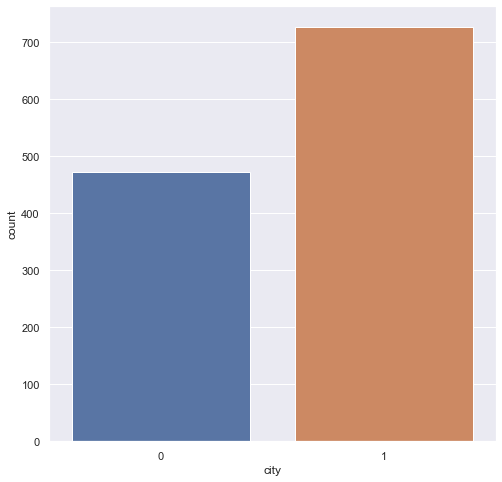

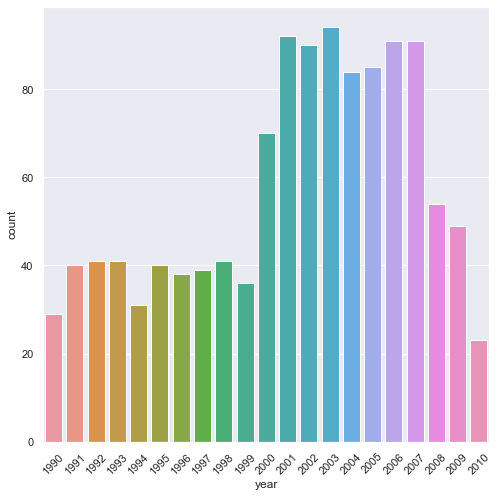

In [54]:
city = sns.countplot(train_set['city'],label="Count") 
plt.show()
year = sns.countplot(train_set['year'],label="Count")
year.set_xticklabels(year.get_xticklabels(), rotation=45)
print()

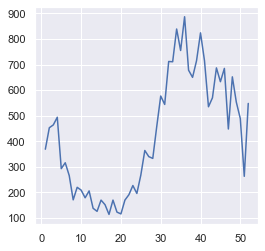

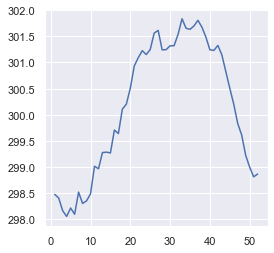

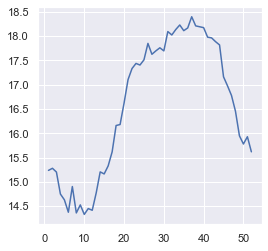

In [57]:
# This is a sine-wavy graph that could be useful in 
cases_per_year = train_set[train_set.city == 1].groupby('weekofyear')['total_cases'].sum()
plt.figure(figsize=(4,4))
plt.plot(cases_per_year)
plt.show()
cases_per_year = train_set[train_set.city == 1].groupby('weekofyear')['station_avg_temp_k'].mean()
plt.figure(figsize=(4,4))
plt.plot(cases_per_year)
plt.show()
cases_per_year = train_set[train_set.city == 1].groupby('weekofyear')['reanalysis_specific_humidity_g_per_kg'].mean()
plt.figure(figsize=(4,4))
plt.plot(cases_per_year)
plt.show()

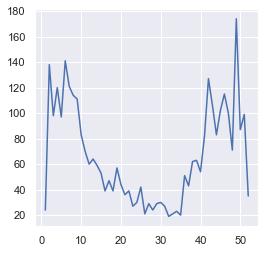

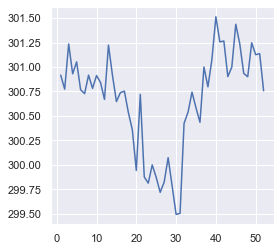

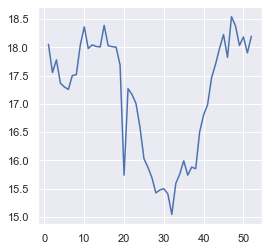

In [58]:
# This is a sine-wavy graph that could be useful in 
cases_per_year = train_set[train_set.city == 0].groupby('weekofyear')['total_cases'].sum()
plt.figure(figsize=(4,4))
plt.plot(cases_per_year)
plt.show()
cases_per_year = train_set[train_set.city == 0].groupby('weekofyear')['station_avg_temp_k'].mean()
plt.figure(figsize=(4,4))
plt.plot(cases_per_year)
plt.show()
cases_per_year = train_set[train_set.city == 0].groupby('weekofyear')['reanalysis_specific_humidity_g_per_kg'].mean()
plt.figure(figsize=(4,4))
plt.plot(cases_per_year)
plt.show()

## Prediction Analysis
Using L1-Lasso, L2-Ridge, Decision Tree, Random Forest and kNN analysis because it was literally this week.


In [59]:
# Imports for analysis
from sklearn import metrics

from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

from sklearn import linear_model
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

import warnings
warnings.filterwarnings("ignore")

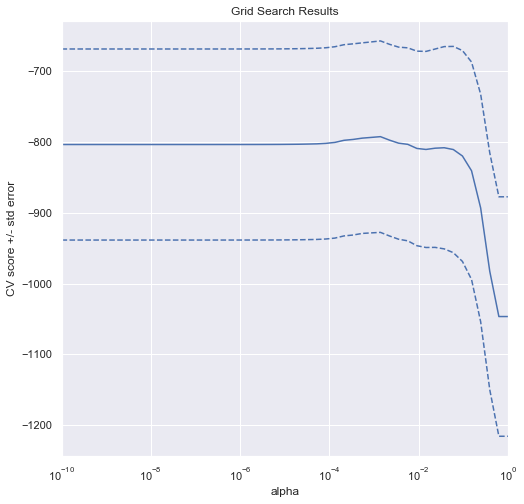

In [60]:
# your code here
n_alphas = 50
alphas = np.logspace(-10, 0, n_alphas)

polynomial_features = PolynomialFeatures(degree=2, include_bias=True)
lasso = Lasso(normalize=True)
pipeline_l1 = Pipeline(steps=[("polynomial_features", polynomial_features), ("lasso", lasso)])

# print(pipeline_l1.get_params().keys())
parameters = [{'lasso__alpha': alphas}]
n_folds = 10

clf_l1 = GridSearchCV(pipeline_l1, param_grid=parameters, cv=n_folds, scoring='neg_mean_squared_error')
clf_l1.fit(Xtrain, ytrain)

scores = clf_l1.cv_results_['mean_test_score']
scores_std = clf_l1.cv_results_['std_test_score']
plt.semilogx(alphas, scores)

# plot error lines showing +/- std. errors of the scores
std_error = scores_std / np.sqrt(n_folds)
plt.semilogx(alphas, scores + std_error, 'b--')
plt.semilogx(alphas, scores - std_error, 'b--')

plt.ylabel('CV score +/- std error')
plt.xlabel('alpha')
plt.title('Grid Search Results')
plt.xlim([alphas[0], alphas[-1]])
plt.show()

In [82]:
best_alpha = clf_l1.best_params_['lasso__alpha'] # build the final model with the optimal alpha

# Make model pipeline
polynomial_features = PolynomialFeatures(degree=2,include_bias=True)
lasso = Lasso(alpha=best_alpha)
pipeline_L1 = Pipeline([("polynomial_features", polynomial_features), ("lasso", lasso)])

pipeline_L1 = pipeline_L1.fit(Xtrain,ytrain)
features = train_set.drop(columns=['total_cases']).columns

coeffs = []
for i in pipeline_L1[0].powers_:
    to_add = ""
    count = 0
    for j in range(len(i)):
        if i[j] != 0:
            if count != 0:
                to_add += "."
            to_add += features[j]
            if i[j] != 1:
                to_add += "^" + str(i[j])
            count += 1
    coeffs.append(to_add)

coeff = pd.DataFrame(pipeline_L1[ -1].coef_.T, coeffs, columns=['Coefficient'])
abs(coeff).sort_values(by="Coefficient", ascending=False).head(10)

,Coefficient
ndvi_nw.ndvi_sw,274.621890
ndvi_ne.ndvi_nw,179.760644
ndvi_sw^2,71.831628
ndvi_nw.ndvi_se,49.824747
ndvi_ne^2,40.100849
ndvi_nw^2,25.509712
city.ndvi_ne,24.684966
city.ndvi_nw,23.052264
city,18.620795
city.ndvi_se,17.637706
